<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(1_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_1.2_n20.csv',
 'data_add_delta_1.2_n30.csv',
 'data_add_delta_1.2_n60.csv',
 'data_add_delta_1.2_n120.csv',
 'data_add_delta_1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,80.544966,87.581487,22.085950,97.109177,-33.675190,263.646390,298.260895,-34.614505
1,0.0,1.0,39.598115,95.029415,77.091744,69.845994,5.755732,297.320999,292.671325,4.649674
2,0.0,2.0,71.967969,36.621894,71.808251,81.520711,-3.921641,267.997184,271.098681,-3.101497
3,0.0,3.0,68.403396,71.861805,56.258150,23.136034,7.011477,236.670861,230.568894,6.101967
4,0.0,4.0,66.129648,48.655966,64.946375,27.511149,2.395626,219.638765,217.662504,1.976261
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,69.736954,91.056441,85.869109,32.600834,-6.398764,282.864573,288.465127,-5.600555
249996,999.0,246.0,82.538947,80.091658,88.366734,64.572516,-1.682381,323.887473,323.405802,0.481671
249997,999.0,247.0,78.097883,50.601386,50.228343,34.232380,-6.467867,216.692125,224.376495,-7.684370
249998,999.0,248.0,96.166558,21.603742,48.738017,94.228330,-8.333797,262.402852,269.702362,-7.299511


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,80.544966,87.581487,22.085950,97.109177,-33.675190,263.646390,298.260895,-34.614505
1,0.0,1.0,39.598115,95.029415,77.091744,69.845994,5.755732,297.320999,292.671325,4.649674
2,0.0,2.0,71.967969,36.621894,71.808251,81.520711,-3.921641,267.997184,271.098681,-3.101497
3,0.0,3.0,68.403396,71.861805,56.258150,23.136034,7.011477,236.670861,230.568894,6.101967
4,0.0,4.0,66.129648,48.655966,64.946375,27.511149,2.395626,219.638765,217.662504,1.976261
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,69.736954,91.056441,85.869109,32.600834,-6.398764,282.864573,288.465127,-5.600555
249996,999.0,246.0,82.538947,80.091658,88.366734,64.572516,-1.682381,323.887473,323.405802,0.481671
249997,999.0,247.0,78.097883,50.601386,50.228343,34.232380,-6.467867,216.692125,224.376495,-7.684370
249998,999.0,248.0,96.166558,21.603742,48.738017,94.228330,-8.333797,262.402852,269.702362,-7.299511


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    80.544966  87.581487  22.085950  97.109177 -33.675190   
      1.0    39.598115  95.029415  77.091744  69.845994   5.755732   
      2.0    71.967969  36.621894  71.808251  81.520711  -3.921641   
      3.0    68.403396  71.861805  56.258150  23.136034   7.011477   
      4.0    66.129648  48.655966  64.946375  27.511149   2.395626   
...                ...        ...        ...        ...        ...   
999.0 245.0  69.736954  91.056441  85.869109  32.600834  -6.398764   
      246.0  82.538947  80.091658  88.366734  64.572516  -1.682381   
      247.0  78.097883  50.601386  50.228343  34.232380  -6.467867   
      248.0  96.166558  21.603742  48.738017  94.228330  -8.333797   
      249.0  21.655774  43.196594  97.291391  43.193364 -16.446232   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    263.646390  298.260895 -34.614505  
      1.0    297.320999  292.671325   4.649674  
      2.0    267.997184  271.098681  -3.101497  
      3.0    236.670861  230.568894   6.101967  
      4.0    219.638765  217.662504   1.976261  
...                 ...         ...        ...  
999.0 245.0  282.864573  288.465127  -5.600555  
      246.0  323.887473  323.405802   0.481671  
      247.0  216.692125  224.376495  -7.684370  
      248.0  262.402852  269.702362  -7.299511  
      249.0  198.890890  214.484072 -15.593182  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    80.544966  87.581487  22.085950  97.109177 -33.675190   
      1.0    39.598115  95.029415  77.091744  69.845994   5.755732   
      2.0    71.967969  36.621894  71.808251  81.520711  -3.921641   
      3.0    68.403396  71.861805  56.258150  23.136034   7.011477   
      4.0    66.129648  48.655966  64.946375  27.511149   2.395626   
...                ...        ...        ...        ...        ...   
999.0 245.0  69.736954  91.056441  85.869109  32.600834  -6.398764   
      246.0  82.538947  80.091658  88.366734  64.572516  -1.682381   
      247.0  78.097883  50.601386  50.228343  34.232380  -6.467867   
      248.0  96.166558  21.603742  48.738017  94.228330  -8.333797   
      249.0  21.655774  43.196594  97.291391  43.193364 -16.446232   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    263.646390  298.260895 -34.614505  
      1.0    297.320999  292.671325   4.649674  
      2.0    267.997184  271.098681  -3.101497  
      3.0    236.670861  230.568894   6.101967  
      4.0    219.638765  217.662504   1.976261  
...                 ...         ...        ...  
999.0 245.0  282.864573  288.465127  -5.600555  
      246.0  323.887473  323.405802   0.481671  
      247.0  216.692125  224.376495  -7.684370  
      248.0  262.402852  269.702362  -7.299511  
      249.0  198.890890  214.484072 -15.593182  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,80.544966,87.581487,22.085950,97.109177,-33.675190,263.646390,298.260895,-34.614505
1,0.0,1.0,39.598115,95.029415,77.091744,69.845994,5.755732,297.320999,292.671325,4.649674
2,0.0,2.0,71.967969,36.621894,71.808251,81.520711,-3.921641,267.997184,271.098681,-3.101497
3,0.0,3.0,68.403396,71.861805,56.258150,23.136034,7.011477,236.670861,230.568894,6.101967
4,0.0,4.0,66.129648,48.655966,64.946375,27.511149,2.395626,219.638765,217.662504,1.976261
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,69.736954,91.056441,85.869109,32.600834,-6.398764,282.864573,288.465127,-5.600555
249996,999.0,246.0,82.538947,80.091658,88.366734,64.572516,-1.682381,323.887473,323.405802,0.481671
249997,999.0,247.0,78.097883,50.601386,50.228343,34.232380,-6.467867,216.692125,224.376495,-7.684370
249998,999.0,248.0,96.166558,21.603742,48.738017,94.228330,-8.333797,262.402852,269.702362,-7.299511


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    80.544966  87.581487  22.085950  97.109177 -33.675190   
      1.0    39.598115  95.029415  77.091744  69.845994   5.755732   
      2.0    71.967969  36.621894  71.808251  81.520711  -3.921641   
      3.0    68.403396  71.861805  56.258150  23.136034   7.011477   
      4.0    66.129648  48.655966  64.946375  27.511149   2.395626   
...                ...        ...        ...        ...        ...   
999.0 245.0  69.736954  91.056441  85.869109  32.600834  -6.398764   
      246.0  82.538947  80.091658  88.366734  64.572516  -1.682381   
      247.0  78.097883  50.601386  50.228343  34.232380  -6.467867   
      248.0  96.166558  21.603742  48.738017  94.228330  -8.333797   
      249.0  21.655774  43.196594  97.291391  43.193364 -16.446232   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    263.646390  298.260895 -34.614505  
      1.0    297.320999  292.671325   4.649674  
      2.0    267.997184  271.098681  -3.101497  
      3.0    236.670861  230.568894   6.101967  
      4.0    219.638765  217.662504   1.976261  
...                 ...         ...        ...  
999.0 245.0  282.864573  288.465127  -5.600555  
      246.0  323.887473  323.405802   0.481671  
      247.0  216.692125  224.376495  -7.684370  
      248.0  262.402852  269.702362  -7.299511  
      249.0  198.890890  214.484072 -15.593182  

[250000 rows x 8 columns]

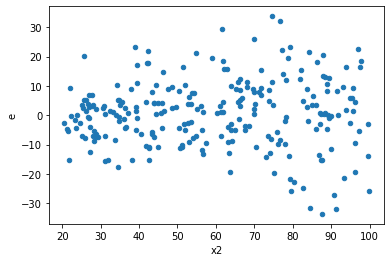

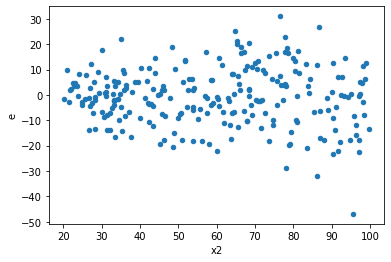

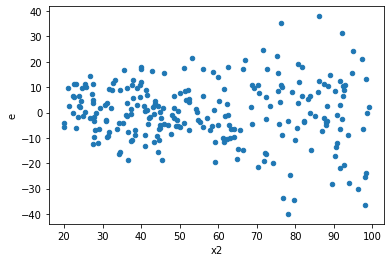

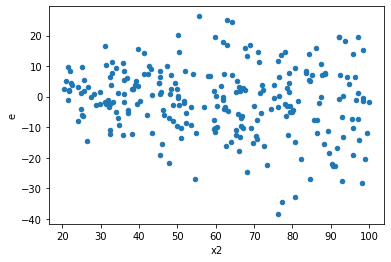

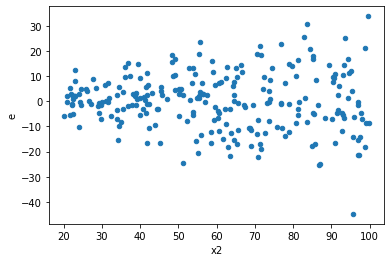

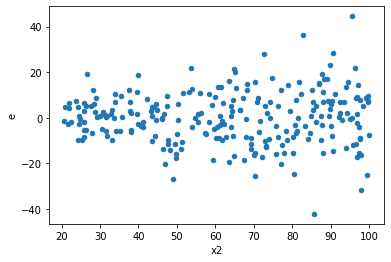

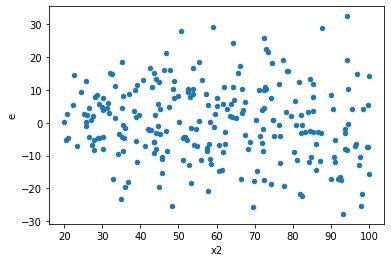

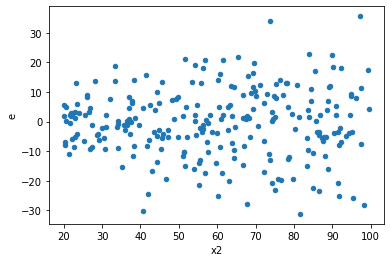

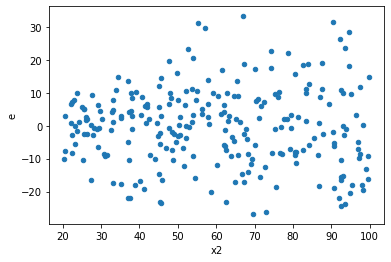

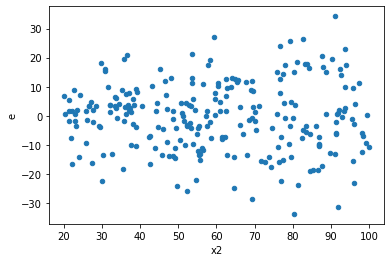

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,96.0,96.0,8522.49350575935,15257.145978720251,88.77597401832656,158.9286039450026,1.7902208981924999,0.004716703026540925,0.9976416484867295,0.0023583515132704624,Reject001=0 : Heteroscedasticity
1.0,96.0,96.0,9646.229638521314,14214.015993523646,100.48155873459702,148.06266659920465,1.4735307499586476,0.058980248516878886,0.9705098757415606,0.029490124258439443,Reject001=1 : Homoscedasticity
2.0,96.0,96.0,10081.619623922365,17382.45421009052,105.01687108252463,181.06723135510958,1.7241727875592756,0.008154102781442463,0.9959229486092788,0.004077051390721231,Reject001=0 : Heteroscedasticity
3.0,96.0,96.0,10651.538200437652,12943.125731836779,110.95352292122554,134.82422637329978,1.2151414648548104,0.34140883081750006,0.82929558459125,0.17070441540875003,Reject001=1 : Homoscedasticity
4.0,96.0,96.0,11206.89704078689,14639.695279979718,116.7385108415301,152.49682583312207,1.3063112141299549,0.19233271917934958,0.9038336404103252,0.09616635958967479,Reject001=1 : Homoscedasticity
5.0,96.0,96.0,7908.86909613217,16818.256225836558,82.3840530847101,175.19016901913082,2.1265058280028333,0.00026811212825195163,0.999865943935874,0.00013405606412597582,Reject001=0 : Heteroscedasticity
6.0,96.0,96.0,10439.17944025707,13332.589629495033,108.74145250267782,138.88114197390658,1.2771683546390606,0.23251155251270972,0.8837442237436451,0.11625577625635486,Reject001=1 : Homoscedasticity
7.0,96.0,96.0,8033.5947175172205,18834.690101114105,83.68327830747104,196.19468855327193,2.3444909487461625,4.077518153033921e-05,0.9999796124092348,2.0387590765169605e-05,Reject001=0 : Heteroscedasticity
8.0,96.0,96.0,11803.310195779519,15376.741003188767,122.95114787270332,160.17438544988298,1.3027481908157417,0.1969041587140481,0.901547920642976,0.09845207935702405,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,8522.49350575935,15257.145978720251,88.77597401832656,158.9286039450026,1.7902208981924999,0.004716703026540925,Reject001=0 : Heteroscedasticity
1.0,96.0,96.0,9646.229638521314,14214.015993523646,100.48155873459702,148.06266659920465,1.4735307499586476,0.058980248516878886,Reject001=1 : Homoscedasticity
2.0,96.0,96.0,10081.619623922365,17382.45421009052,105.01687108252463,181.06723135510958,1.7241727875592756,0.008154102781442463,Reject001=0 : Heteroscedasticity
3.0,96.0,96.0,10651.538200437652,12943.125731836779,110.95352292122554,134.82422637329978,1.2151414648548104,0.34140883081750006,Reject001=1 : Homoscedasticity
4.0,96.0,96.0,11206.89704078689,14639.695279979718,116.7385108415301,152.49682583312207,1.3063112141299549,0.19233271917934958,Reject001=1 : Homoscedasticity
5.0,96.0,96.0,7908.86909613217,16818.256225836558,82.3840530847101,175.19016901913082,2.1265058280028333,0.00026811212825195163,Reject001=0 : Heteroscedasticity
6.0,96.0,96.0,10439.17944025707,13332.589629495033,108.74145250267782,138.88114197390658,1.2771683546390606,0.23251155251270972,Reject001=1 : Homoscedasticity
7.0,96.0,96.0,8033.5947175172205,18834.690101114105,83.68327830747104,196.19468855327193,2.3444909487461625,4.077518153033921e-05,Reject001=0 : Heteroscedasticity
8.0,96.0,96.0,11803.310195779519,15376.741003188767,122.95114787270332,160.17438544988298,1.3027481908157417,0.1969041587140481,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      665
Reject001=0 : Heteroscedasticity    335
Name: Result_test, dtype: int64